# Датасет №3 "Income Classification"

### Описание датасета

Информация об атрибутах:

- возраст: постоянный.
- класс работы: Частный, Самозанятый-не-инк, Самозанятый-инк, Федеральное правительство, Местное правительство, Государственное правительство, Без оплаты, Никогда не работал.
- fnlwgt: непрерывный.
- образование: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: непрерывный.
- семейное положение: Женат - гражданский супруг, Разведен, Никогда не был женат, Разлучен, Вдовец, Женат-супруг-отсутствует, Женат-АФ-супруг.
- род занятий: Техподдержка, Ремесло-ремонт, Прочие услуги, Продажи, Исполнительный-менеджер, Проф-специальность, Обработчики-уборщики, Машинист-оп-инспектор, Адм-клирикал, Фермерство-рыбалка, Транспорт-перевозки, Частный дом-служба, Защитник-служба, Вооруженные силы.
- отношения: Жена, Собственный ребенок, Муж, Не в семье, Другой родственник, Не замужем.
- раса: Белый, Азиатско-Тихоокеанский, Исландец, Американский индеец-эскимос, Другой, Черный.
- пол: Женский, Мужской.
- прирост капитала: непрерывный.
- потеря капитала: непрерывный.
- часы в неделю: непрерывный.
- страна происхождения: Соединенные Штаты, Камбоджа, Англия, Пуэрто-Рико, Канада, Германия, Аутлинг-США (Гуам-УСВИ-etc), Индия, Япония, Греция, Юг, Китай, Куба, Иран, Гондурас, Филиппины, Италия, Польша, Ямайка, Вьетнам, Мексика, Португалия, Ирландия, Франция, Доминиканская Республика, Лаос, Эквадор, Тайвань, Гаити, Колумбия, Венгрия, Гватемала, Никарагуа, Шотландия, Таиланд, Югославия, Эль-Сальвадор, Тринад и Тобаго, Перу, Гонг, Голандия-Нидерланды.

### Импорт модулей

In [146]:
# импорт стандартных модулей 

import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

from collections import Counter

In [147]:
# иморт модулей sklearn'а

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Загрузка датасета и подготовка данных

Файл я брала с выгруженного на свой гитхаб репозитория

In [148]:
df = pd.read_csv('https://raw.githubusercontent.com/almondloverr/ml_exam/main/datasets/income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [149]:
print("В датасете", df.shape[0], "точек данных и", df.shape[1], "параметров")

В датасете 32561 точек данных и 15 параметров


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [151]:
df.columns # income — наша целевая переменная

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

Так как у нас очень криво названы колонки (начинаются с пробелов), нам нужно это откорректировать 

In [152]:
df.columns = df.columns.str.lstrip()

In [153]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

То же самое сделаем со всеми строками, так как пробелы у нас примерно везде в начале строки

In [154]:
df = df[df.select_dtypes(include='object').columns.tolist()].apply(lambda x: x.str.lstrip())

In [155]:
df['income'].unique() 

array(['<=50K', '>50K'], dtype=object)

In [156]:
df.isnull().sum() # смотрим количество пустых значений в датасете (отустутстуют)

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
income            0
dtype: int64

In [157]:
df.describe().T # описательная статистика по категориальным параметрам

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [158]:
df.describe(include=object).T # описательная статистика по числовым параметрам

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
income,32561,2,<=50K,24720


### Выводим текстовые атрибуты и их уникальные значения для дальнейшего анализа

In [159]:
for column in df.select_dtypes(include='object').columns.tolist():
  print(f'{column}\n{df[column].value_counts()}\n')

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

occupation
Prof-specialty       4140
Craft-repair         4099
E

Нашу целевую переменную заменяем через map-функцию

In [160]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

Остальные категориальные переменные заменим через LabelEncoder, так как параметров слишком много и использовать дамми-переменные нецелесообразно

In [161]:
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [162]:
df.dtypes

workclass         int64
education         int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
native-country    int64
income            int64
dtype: object

### Визуализация данных

#### Построим гистограммы, чтобы проанализировать распределение каждого из признаков

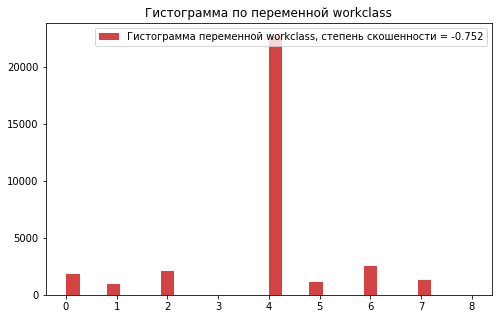

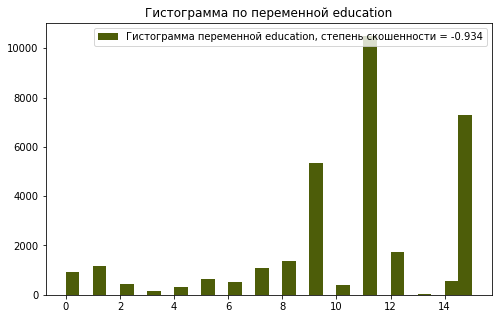

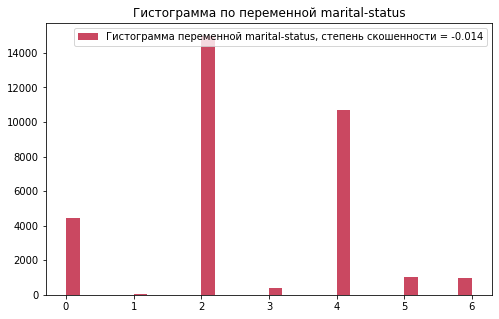

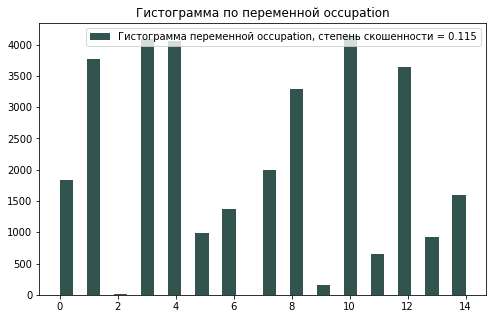

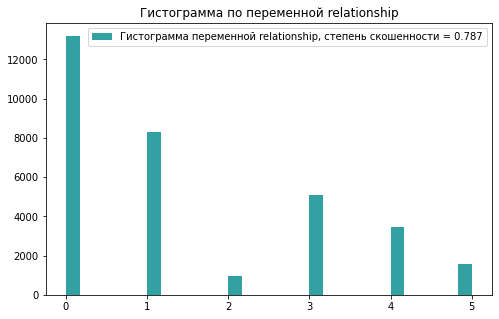

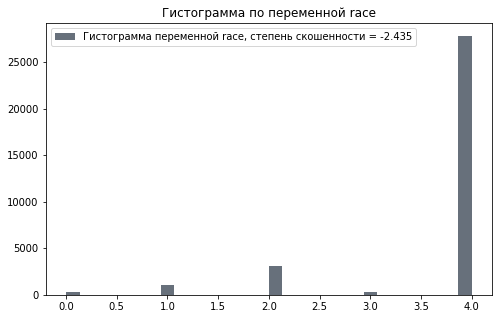

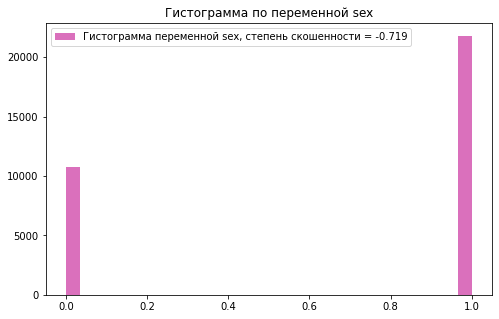

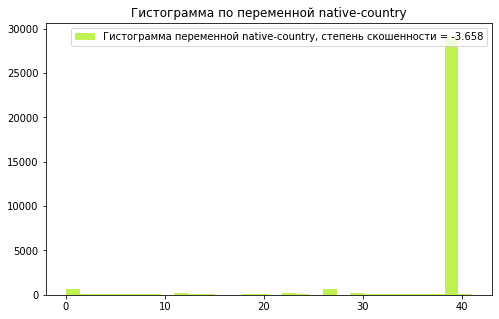

In [163]:
for feat in df.columns[:-1].tolist():
    plt.figure(figsize=(8, 5)) 
    plt.hist(df[feat], color=np.random.rand(3,), label=f'Гистограмма переменной {feat}, степень скошенности = %.3f'%(df[feat].skew()), bins=30) 
    plt.title(f'Гистограмма по переменной {feat}')
    plt.legend(loc='best')
    plt.show()

Ни одна из характеристик не имеет нормального распределения. Характеристики Fe, Ba, Ca и K имеют самые высокие коэффициенты перекоса. Более того, распределение калия (K) и бария (Ba), похоже, содержит много выбросов.

#### Построим ящики с усами, чтобы проанализировать датасет на наличие выбросов

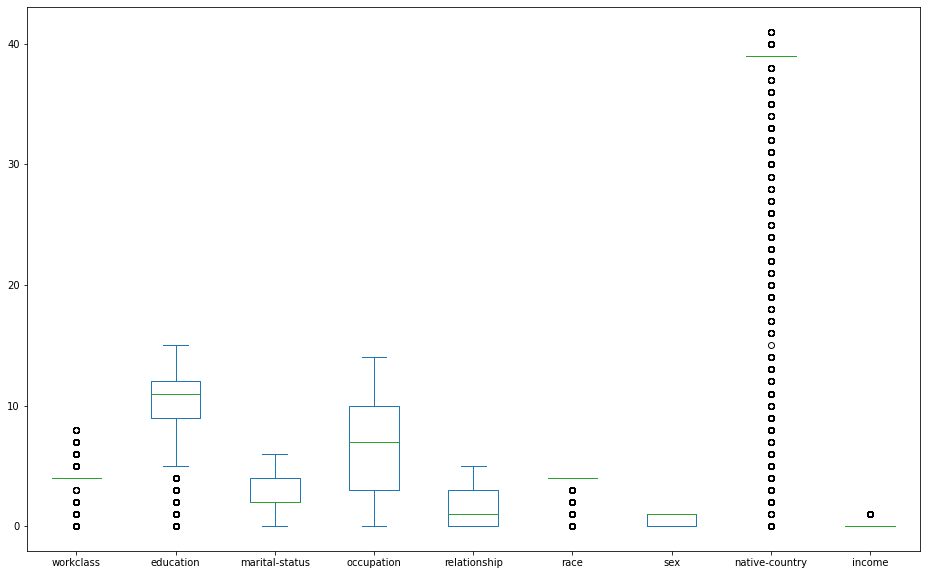

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(16,10))
df.plot(kind='box', ax=ax)

#### Посмотрим, как признаки коррелируют между собой 

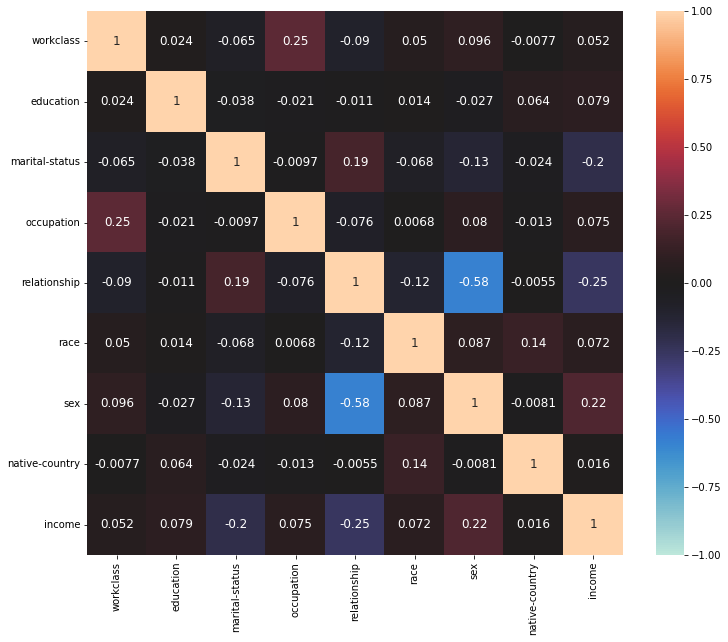

In [165]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 12}, vmin=-1, vmax=1, center=0)

### Очищаем датасет от выбросов 

In [166]:
def outliers(df):
  
  outlier_idx = []

  for col in df.columns.tolist():
    # считаем нижнюю и верхнюю границу через 1 и 3 квартили 
    q25 = df[col].quantile(q=.25)
    q75 = df[col].quantile(q=.75)
    iqr = q75-q25

    max_border = q75 + (1.5*iqr)
    min_border = q25 - (1.5*iqr)
        
    # определем индекс строки, содержащей выбросы
    outlier_list_col = df[(df[col] < min_border) | (df[col] > max_border)].index
    
    # заполняем найденными индеками массив со всеми индексами
    outlier_idx.extend(outlier_list_col)
    
  # выбираем индексы строк, содержащих больше чем два выброса
  outlier_idx = Counter(outlier_idx)        
  multiple_outliers = list( k for k, v in outlier_idx.items() if v > 2 )
  
  return multiple_outliers   

print(f'Этот датасет содержит {len(outliers(df[df.columns[:-1].tolist()]))} точек данных с более чем 2 выбросами')   

Этот датасет содержит 610 точек данных с более чем 2 выбросами


Очищаем лишние строки, 

In [167]:
df = df.drop(outliers(df[df.columns[:-1].tolist()])).reset_index(drop=True)
df.shape

(31951, 9)

### Выделяем целевую переменную и остальные признаки

In [168]:
y = df['income']
x = df.drop(['income'], axis=1)

### Разделяем выбору в соотношении 80/20 процентов, `shuffle=False` для исключения перемешивания данных

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=True)

In [170]:
print(f'Количество точек исходных данных: {y.shape[0]}')
print(f'Количество точек тренировочных данных: {y_train.shape[0]}')
print(f'Количество точек тестовых данных: {y_test.shape[0]}')

Количество точек исходных данных: 31951
Количество точек тренировочных данных: 25560
Количество точек тестовых данных: 6391


### Нормализуем наши данные 

Я использую для этого МинМаксСкалер, можно еще использовать СтандартСкалер

In [171]:
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

### Задача классификации

Так как этих методов дохуя, сделаем классификацию с использованием основных пяти: 
- логистическая регрессия 
- метод опорных векторов (линейное ядрос)
- метод опорных векторов (гауссовое ядро)
- метод k ближайших соседей 
- метод деревая решений 

#### Логистическая регрессия

In [172]:
from sklearn.linear_model import LogisticRegression

In [173]:
cls = LogisticRegression(solver='lbfgs', max_iter=1000).fit(x_train, y_train)
y_pred_cls = cls.predict(x_test)

matrix_cls = metrics.confusion_matrix(y_test, y_pred_cls)
print(matrix_cls)

[[4839   81]
 [1455   16]]


In [174]:
print(f'Метрика достоверности (logistic): {metrics.accuracy_score(y_test, y_pred_cls)}')
print(f'Метрика точности (logistic): {metrics.precision_score(y_test, y_pred_cls, average = "micro")}')
print(f'Метрика полноты (logistic): {metrics.recall_score(y_test, y_pred_cls, average = "micro")}')

Метрика достоверности (logistic): 0.7596620247222657
Метрика точности (logistic): 0.7596620247222657
Метрика полноты (logistic): 0.7596620247222657


#### Метод опорных векторов с линейным ядром 

In [175]:
from sklearn import svm

In [176]:
svc = svm.SVC(kernel='linear', probability=True).fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)
print(matrix_svc)

[[4920    0]
 [1471    0]]


In [177]:
print(f'Метрика достоверности (svc linear): {metrics.accuracy_score(y_test, y_pred_svc)}')
print(f'Метрика точности (svc linear): {metrics.precision_score(y_test, y_pred_svc, average = "micro")}')
print(f'Метрика полноты (svc linear): {metrics.recall_score(y_test, y_pred_svc, average = "micro")}')

Метрика достоверности (svc linear): 0.7698325770614928
Метрика точности (svc linear): 0.7698325770614928
Метрика полноты (svc linear): 0.7698325770614928


#### Метод опорных векторов с гауссовым ядром 

In [178]:
svc_g = svm.SVC(kernel='rbf', probability=True).fit(x_train, y_train)
y_pred_svc_g = svc_g.predict(x_test)

matrix_svc_g = metrics.confusion_matrix(y_test, y_pred_svc_g)
print(matrix_svc_g)

[[4429  491]
 [ 961  510]]


In [179]:
print(f'Метрика достоверности (svc rbf): {metrics.accuracy_score(y_test, y_pred_svc_g)}')
print(f'Метрика точности (svc rbf): {metrics.precision_score(y_test, y_pred_svc_g, average = "micro")}')
print(f'Метрика полноты (svc rbf): {metrics.recall_score(y_test, y_pred_svc_g, average = "micro")}')

Метрика достоверности (svc rbf): 0.7728055077452668
Метрика точности (svc rbf): 0.7728055077452668
Метрика полноты (svc rbf): 0.7728055077452668


#### Метод k ближайших соседей

In [180]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
# количество соседей n_neighbors = 10 подбирала вручную, проверку делала на метрике точности
kn = KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)
y_pred_kn = kn.predict(x_test)

matrix_kn = metrics.confusion_matrix(y_test, y_pred_kn)
print(matrix_kn)

[[4562  358]
 [ 763  708]]


In [182]:
print(f'Метрика достоверности (KN): {metrics.accuracy_score(y_test, y_pred_kn)}')
print(f'Метрика точности (KN): {metrics.precision_score(y_test, y_pred_kn, average = "micro")}')
print(f'Метрика полноты (KN): {metrics.recall_score(y_test, y_pred_kn, average = "micro")}')

Метрика достоверности (KN): 0.8245970896573306
Метрика точности (KN): 0.8245970896573306
Метрика полноты (KN): 0.8245970896573306


### Метод дерева решений 

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
print(matrix_dt)

[[4435  485]
 [ 650  821]]


In [185]:
print(f'Метрика достоверности (dec tree): {metrics.accuracy_score(y_test, y_pred_dt)}') 
print(f'Метрика точности (dec tree): {metrics.precision_score(y_test, y_pred_dt, average = "micro")}')
print(f'Метрика полноты (dec tree): {metrics.recall_score(y_test, y_pred_dt, average = "micro")}')

Метрика достоверности (dec tree): 0.8224065091534971
Метрика точности (dec tree): 0.8224065091534971
Метрика полноты (dec tree): 0.8224065091534971


### Оценка эффективности обучения моделей (метрики)

In [186]:
clas = {'LogisticRegression': y_pred_cls, 'SVC linear': y_pred_svc, 
        'SVC rbf': y_pred_svc_g, 'KNeighbors': y_pred_kn, 'DecisionTree': y_pred_dt}

for n, y_pred in clas.items():
  print(f'Достоверность ({n}): {metrics.accuracy_score(y_test, y_pred)}')
  print(f'Точность ({n}): {metrics.precision_score(y_test, y_pred, average = "micro")}')
  print(f'Полнота ({n}): {metrics.recall_score(y_test, y_pred, average = "micro")}\n')

Достоверность (LogisticRegression): 0.7596620247222657
Точность (LogisticRegression): 0.7596620247222657
Полнота (LogisticRegression): 0.7596620247222657

Достоверность (SVC linear): 0.7698325770614928
Точность (SVC linear): 0.7698325770614928
Полнота (SVC linear): 0.7698325770614928

Достоверность (SVC rbf): 0.7728055077452668
Точность (SVC rbf): 0.7728055077452668
Полнота (SVC rbf): 0.7728055077452668

Достоверность (KNeighbors): 0.8245970896573306
Точность (KNeighbors): 0.8245970896573306
Полнота (KNeighbors): 0.8245970896573306

Достоверность (DecisionTree): 0.8224065091534971
Точность (DecisionTree): 0.8224065091534971
Полнота (DecisionTree): 0.8224065091534971



**На основе метрик мы видим, что наиболее хорошо показала себя модель метода дерева решений** 

### Выводы об обученности моделей 

Находим вероятность принадлежности классу с помощью метода `.predict_proba`:

In [187]:
y_pred_cls_proba = cls.predict_proba(x_test)
cls_probs = y_pred_cls_proba[:, 1]
cls_fpr, cls_tpr, cls_treshold = metrics.roc_curve(y_test, cls_probs)

In [188]:
y_pred_svc_proba = svc.predict_proba(x_test)
svc_probs = y_pred_svc_proba[:, 1]
svc_fpr, svc_tpr, svc_treshold = metrics.roc_curve(y_test, svc_probs)

In [189]:
y_pred_svc_g_proba = svc_g.predict_proba(x_test)
svc_g_probs = y_pred_svc_g_proba[:, 1]
svc_g_fpr, svc_g_tpr, svc_g_treshold = metrics.roc_curve(y_test, svc_g_probs)

In [190]:
y_pred_kn_proba = kn.predict_proba(x_test)
kn_probs = y_pred_kn_proba[:, 1]
kn_fpr, kn_tpr, kn_treshold = metrics.roc_curve(y_test, kn_probs)

In [191]:
y_pred_dt_proba = dt.predict_proba(x_test)
dt_probs = y_pred_dt_proba[:, 1]
dt_fpr, dt_tpr, dt_treshold = metrics.roc_curve(y_test, dt_probs)

#### Строим ROC-кривые для каждой модели
ROC-кривая описывает взаимосвязь между чувствительностью модели (TPR, или true positives rate — доля истинно положительных примеров) и её специфичностью (описываемой в отношении долей ложноположительных результатов: 1-FPR).

TPR, или чувствительность модели, является соотношением корректных классификаций положительного класса, разделённых на все положительные классы, доступные из набора данных.

FPR — доля ложноположительных примеров, false positives rate. Это соотношение между ложными срабатываниями (количество прогнозов, ошибочно отнесённых в положительные), и всеми доступными отрицательными классами.

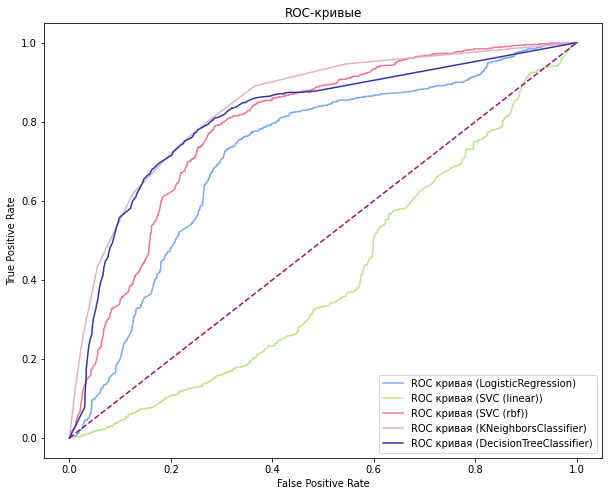

In [192]:
plt.figure(figsize=(10,8))

plt.plot(cls_fpr, cls_tpr, color=np.random.rand(3,),
         label='ROC кривая (LogisticRegression)')
plt.plot(svc_fpr, svc_tpr, color=np.random.rand(3,),
         label='ROC кривая (SVC (linear))')
plt.plot(svc_g_fpr, svc_g_tpr, color=np.random.rand(3,),
         label='ROC кривая (SVC (rbf))')
plt.plot(kn_fpr, kn_tpr, color=np.random.rand(3,),
         label='ROC кривая (KNeighborsClassifier)')
plt.plot(dt_fpr, dt_tpr, color=np.random.rand(3,),
         label='ROC кривая (DecisionTreeClassifier)')
plt.plot([0, 1], [0, 1], color=np.random.rand(3,), linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend()
plt.show()

In [193]:
cls_roc_auc = metrics.auc(cls_fpr, cls_tpr)
svc_roc_auc = metrics.auc(svc_fpr, svc_tpr)
svc_g_roc_auc = metrics.auc(svc_g_fpr, svc_g_tpr)
kn_roc_auc = metrics.auc(kn_fpr, kn_tpr)
dt_roc_auc = metrics.auc(dt_fpr, dt_tpr)

auc_df = pd.DataFrame({
    'Модель классификации': ['Логистическая регрессия', 'Опорные вектора (линейное ядро)', 
                          'Опорные вектора (гауссовое ядро)', 'k ближайших соседей', 'Дерево решений'],
    'AUC': [cls_roc_auc, svc_roc_auc, svc_g_roc_auc, kn_roc_auc, dt_roc_auc]})
auc_df.sort_values(by = 'AUC', ascending = False, inplace=True)
auc_df.set_index([pd.Index([1, 2, 3, 4, 5])], inplace=True)
auc_df

,Модель классификации,AUC
1,k ближайших соседей,0.841949
2,Дерево решений,0.812642
3,Опорные вектора (гауссовое ядро),0.791524
4,Логистическая регрессия,0.718408
5,Опорные вектора (линейное ядро),0.408884


### Вывод о недообученности/переобученности модели

In [194]:
acc_cls = metrics.accuracy_score(y_test, y_pred_cls)
acc_svc = metrics.accuracy_score(y_test, y_pred_svc)
acc_svc_g = metrics.accuracy_score(y_test, y_pred_svc_g)
acc_kn = metrics.accuracy_score(y_test, y_pred_kn)
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)

acc_train_cls = metrics.accuracy_score(y_train, cls.predict(x_train))
acc_train_svc = metrics.accuracy_score(y_train, svc.predict(x_train))
acc_train_svc_g = metrics.accuracy_score(y_train, svc_g.predict(x_train))
acc_train_kn = metrics.accuracy_score(y_train, kn.predict(x_train))
acc_train_dt = metrics.accuracy_score(y_train, dt.predict(x_train))

In [195]:
trained = pd.DataFrame(columns = ['test data', 'train data'])

logistic = [acc_cls, acc_train_cls]
svm = [acc_svc, acc_train_svc]
svm_g = [acc_svc, acc_train_svc]
kneighbors = [acc_kn, acc_train_kn]
dtree = [acc_dt, acc_train_dt]

trained.loc[0] = logistic
trained.loc[1] = svm
trained.loc[2] = svm_g
trained.loc[3] = kneighbors
trained.loc[4] = dtree

trained['result'] = trained.apply(lambda x: 'обучена адекватно' if (abs(x['test data'] - x['train data']) <= 0.015) else 
                                  ('недообучена' if (x['test data'] > x['train data']) else 'переобучена'), axis=1)
trained.set_axis(['LogisticRegression', 'SVC linear', 'SVC rbf', 'KNeighbors', 'DecisionTree'], axis='index', inplace=True)

trained

,test data,train data,result
LogisticRegression,0.759662,0.748631,обучена адекватно
SVC linear,0.769833,0.755282,обучена адекватно
SVC rbf,0.769833,0.755282,обучена адекватно
KNeighbors,0.824597,0.829460,обучена адекватно
DecisionTree,0.822407,0.865415,переобучена
